# 3 Least squares

## Question 3.1

\begin{equation}
Aw = \tilde{x}^{T} w_1 + w_0 -y(t) \tilde{x}^{T} w_2 = y(t) \\
\tilde{x}^{T} w_1 + w_0 = y(t) \tilde{x}^{T} w_2 + y(t)
\end{equation}

Because $\tilde{x}$ is a line vector, $w2$ is a colonm vector, therefore $\tilde{x}^{T} w_2$ is a number.

Thus,
\begin{equation}
y(t) = \frac{\tilde{x}^{T} w_1 + w_0}{1 + \tilde{x}^{T}w_2} = \frac{w_1^T \tilde{x} + w_0}{1 + w_2^T \tilde{x}}
\end{equation}


## Question 3.2

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Loading data

data_matrix_train, COP_train, data_matrix_test, COP_test, names = np.load('data_center_data_matrix.npy', allow_pickle=True)

# Constructing matrices for min_w ||A w - b||_2**2

matrix_mean = np.mean(data_matrix_train, axis=0)
M = data_matrix_train - matrix_mean
matrix_std = np.std(M, axis=0)
M = M / matrix_std

A = np.hstack([M, np.ones((M.shape[0],1)), -(M.T * COP_train[:,3]).T])
b = COP_train[:,3]

# Constructing matrices for the test set

M_test = (data_matrix_test - matrix_mean) / matrix_std
A_test = np.hstack([M_test, np.ones((M_test.shape[0],1)), -(M_test.T * COP_test[:,3]).T])
b_test = COP_test[:,3]


# Loading raw data
import pandas as pd
data = pd.read_csv('Raw_Dataset_May.csv')

def name_to_subcategory_and_details(col_name):
    if np.isreal(col_name):
        col_name = names[col_name]
    indices = np.nonzero((data['NAME'] == col_name).values)[0]
    if len(indices) > 0:
        subcategory = data['SUBCATEGORY'].iloc[[indices[0]]].values[0]
        details = data['DETAILS'].iloc[[indices[0]]].values[0]
        return subcategory, details
    else:
        print('unknown name')

In [50]:
w_hat, residuals, rank, s = np.linalg.lstsq(A, b, rcond=None)

print('w_hat:', w_hat)


w_hat: [-0.00927821  0.08309371 -0.03672704 ...  0.01980595 -0.03057174
 -0.01188614]


## Question 3.3

Mean Squared Error: 780.8984793523347
R-squared score: -40.87585582906789


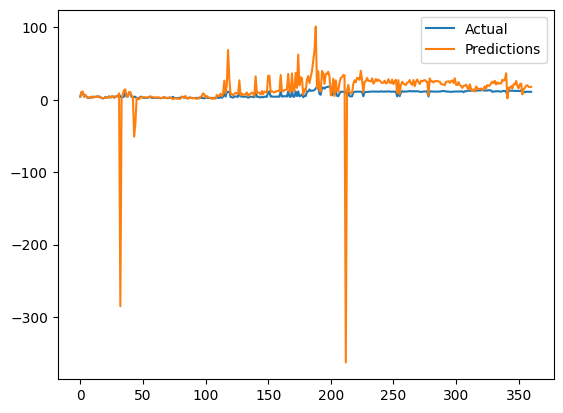

In [51]:
# Predictions for the test set
y_pred = A_test.dot(w_hat)

# Compute Mean Squared Error (MSE)
mse = np.mean((y_pred - b_test) ** 2)

# Compute R-squared score
ss_res = np.sum((y_pred - b_test) ** 2)
ss_tot = np.sum((b_test - np.mean(b_test)) ** 2)
r2_score = 1 - (ss_res / ss_tot)

print("Mean Squared Error:", mse)
print("R-squared score:", r2_score)

# Optionally, plot the predictions against the true values
# plt.scatter(b_test, y_pred, label='Predictions vs Actual')
plt.plot(b_test, label='Actual')
plt.plot(y_pred, label='Predictions')
# plt.plot([b_test.min(), b_test.max()], [b_test.min(), b_test.max()], 'k--', lw=4, label='Ideal fit')
# plt.xlabel('Actual Values')
# plt.ylabel('Predictions')
plt.legend()
plt.show()


## Question 3.4

In [52]:
from scipy.linalg import solve

# Regularization parameter
lambda_reg = 100

# A^T A + lambda * I
AtA_plus_lambdaI = A.T.dot(A) + lambda_reg * np.identity(A.shape[1])

# A^T b
Atb = A.T.dot(b)

# Solve for w
w_ridge = solve(AtA_plus_lambdaI, Atb)

y_pred_ridge = A_test.dot(w_ridge)

mse_ridge = np.mean((y_pred_ridge - b_test) ** 2)

mse_ridge


301.0548280940045

## Question 3.5

Define $ f_1(w) = \frac{1}{2} \|Aw - b\|^2 + \frac{\lambda}{2} \|w\|^2 $

$$
\nabla_w \left(\frac{1}{2} \|Aw - b\|^2\right) = \nabla_w \left(\frac{1}{2} (Aw - b)^T (Aw - b)\right) = A^T(Aw - b)
$$


$$
\nabla_w \left(\frac{\lambda}{2} \|w\|^2\right) = \lambda w
$$

Thus, 

$$
\nabla f_1(w) = A^T(Aw - b) + \lambda w
$$

Use Hessian matrix to check if it is convex.

Hessian matrix of $f_1$ is:

$$
H(f_1(w)) = \nabla^2 f_1(w) = A^TA + \lambda I
$$

Since $A^T A$ is positive semi-definite, and $\lambda I$ is also positive semi-definite, the matrix $H(f_1(w))$ is positive semi-definite, thus the function $f_1(w)$ is convex.


## Question 3.6

In [60]:
alpha = 7e-8
epsilon = 1
max_iterations = 1000000

w = np.zeros(A.shape[1])
for k in range(max_iterations):
    gradient = A.T.dot((A.dot(w) - b)) + lambda_reg * w
    w = w - alpha * gradient
    gradient_norm = np.linalg.norm(gradient)
    if k%1000 == 0:
        print(f"Iteration {k}: Gradient norm = {gradient_norm}")
    if gradient_norm <= epsilon:
        break

print(f"Converged after {k} iterations with a gradient norm of {gradient_norm}")


Iteration 0: Gradient norm = 120927.59130301421
Iteration 1000: Gradient norm = 3492.437932250337
Iteration 2000: Gradient norm = 2311.3757092722462
Iteration 3000: Gradient norm = 1771.1682049446965
Iteration 4000: Gradient norm = 1446.2061846011052
Iteration 5000: Gradient norm = 1227.7391131649806
Iteration 6000: Gradient norm = 1071.0800846059778
Iteration 7000: Gradient norm = 953.388309532986
Iteration 8000: Gradient norm = 861.6313933532089
Iteration 9000: Gradient norm = 787.8642276771933
Iteration 10000: Gradient norm = 727.0149282282488
Iteration 11000: Gradient norm = 675.7275759508718
Iteration 12000: Gradient norm = 631.7130679931734
Iteration 13000: Gradient norm = 593.3668882866043
Iteration 14000: Gradient norm = 559.5358672318534
Iteration 15000: Gradient norm = 529.3717424217617
Iteration 16000: Gradient norm = 502.2369402870143
Iteration 17000: Gradient norm = 477.64260182443616
Iteration 18000: Gradient norm = 455.20697005127573
Iteration 19000: Gradient norm = 434.

## Question 3.7

# 4 Regularization for a sparse model

## Question 4.1

$\min_w \frac{1}{2} \|Aw - b\|_2^2 + \lambda \|w\|_1 = f_2(w) + g_2(w)$, where $f_2(w) = \frac{1}{2} \|Aw - b\|_2^2$ and $g_2(w) = \lambda \|w\|_1$

$$
\text{prox}_{g_2}(v, t) = \text{sgn}(v) \cdot \max(|v| - \lambda t, 0)
$$

Where:
- $v$ is a vector.
- $t$ is a positive scalar.

the gradient of $f_2$: $\nabla f_2(w) = A^T(Aw - b)$

## Question 4.2

In [66]:
def prox(x, threshold):
    return np.sign(x) * np.maximum(np.abs(x) - threshold, 0)

lambda_reg2 = 200
alpha = 8e-9
epsilon = 1
max_iterations = 1000000

w = np.zeros(A.shape[1])
for k in range(max_iterations):
    gradient = A.T.dot((A.dot(w) - b))
    w = prox(w - alpha * gradient, lambda_reg2 * alpha)
    gradient_norm = np.linalg.norm(gradient)
    if k%1000 == 0:
        print(f"Iteration {k}: Gradient norm = {gradient_norm}")
    if gradient_norm <= epsilon:
        break

print(f"Converged after {k} iterations with a gradient norm of {gradient_norm}")

Iteration 0: Gradient norm = 120927.59130301421
Iteration 1000: Gradient norm = 10279.279788877548
Iteration 2000: Gradient norm = 9098.252070205845
Iteration 3000: Gradient norm = 8352.920067027231
Iteration 4000: Gradient norm = 7814.450987330348
Iteration 5000: Gradient norm = 7404.82682288474
Iteration 6000: Gradient norm = 7073.963830681659
Iteration 7000: Gradient norm = 6802.5395569919365
Iteration 8000: Gradient norm = 6570.881845701185
Iteration 9000: Gradient norm = 6362.353007032207
Iteration 10000: Gradient norm = 6183.138068178964
Iteration 11000: Gradient norm = 6027.884116832145
Iteration 12000: Gradient norm = 5884.708302926386
Iteration 13000: Gradient norm = 5769.822990502053
Iteration 14000: Gradient norm = 5668.637293845446
Iteration 15000: Gradient norm = 5584.295138828077
Iteration 16000: Gradient norm = 5511.846200942153
Iteration 17000: Gradient norm = 5448.137939076309
Iteration 18000: Gradient norm = 5383.853754168132
Iteration 19000: Gradient norm = 5318.3406